In [60]:
import pandas as pd
import numpy as np
from sklearn.utils import class_weight
from sklearn.preprocessing import StandardScaler,MinMaxScaler, RobustScaler
import joblib
import pickle
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier, XGBRegressor
from sklearn.metrics import accuracy_score, classification_report
import matplotlib as plt
from xgboost import plot_importance
import matplotlib.pyplot as plt
import statistics as stats


In [31]:
# Path settings

path_var = 1 

if (path_var == 1):
    filepath = '/home/docboy/Desktop/Option_Pricing/datasets/'

else:
    filepath = '/home/sharan/Desktop/Option_Pricing/datasets/'

In [32]:
# data = pd.read_csv(filepath + 'BANKNIFTY_feature_set_ECDF_STEP_2.csv')

data = pd.read_csv(filepath + 'NIFTY50_feature_set_ECDF_STEP_2.csv')

In [33]:
data=data.loc[data['ttm']>3,:]
data=data.loc[data['ttm']<=45,:]
bound=np.percentile(data['percentage'],100)
data=data.loc[data['percentage']<bound]

In [34]:
len(data)
# if (data.loc[:, 'percentage'] >= 5) is True:
#     data.loc[:, 'Date']
# data.loc[data["percentage"] >= 5]

13517

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1ce3e5fa58>]],
      dtype=object)

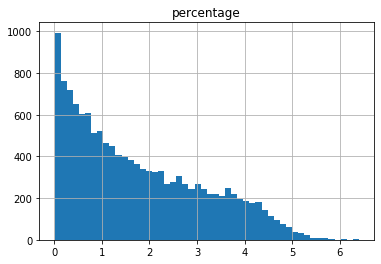

In [35]:
# original Data
data.hist(column='percentage', bins =50)

In [36]:
maxVal=5
minVal=0

In [42]:
np.linspace(5, 200, 20)

array([  5.        ,  15.26315789,  25.52631579,  35.78947368,
        46.05263158,  56.31578947,  66.57894737,  76.84210526,
        87.10526316,  97.36842105, 107.63157895, 117.89473684,
       128.15789474, 138.42105263, 148.68421053, 158.94736842,
       169.21052632, 179.47368421, 189.73684211, 200.        ])

In [43]:
bin_val = []
em = []
for j in np.linspace(5, 200, 20):
    bins = round(j)
    bins = bins.astype(int)
    step=(maxVal-minVal)/bins
    print('Number of bins is :', bins)
    

    bin_val.append(bins)    
    
    thresh=[]
    for k in range(0,bins):
        val=(minVal+(k*step))
        val=val
        thresh.append(val)
        
    Target=[-1] * len(data)
    data['Target']=Target

    for i in range(len(thresh)-1,-1,-1):
        data.loc[np.logical_and(data['percentage']>=thresh[i],data['Target']==-1),'Target']=i
#         print("Class {}:".format(i))
#         print(len(data.loc[data['Target']==i]))
    data = data.dropna()
    
    
    
    feats = data
    dropNames = ['date', 'percentage','strike','spot','opPrice']
    X=feats.iloc[:,:-1]
    Y=feats.loc[:,'Target']
    X = X.drop(dropNames, axis = 1)
    
    
    featNames = list(X)  
    scaler = RobustScaler()
    X = scaler.fit_transform(X)
    X = pd.DataFrame(X, columns = featNames)
    
    a = len(feats)
    split_val = round(a*0.8)

    # Removing the Random splits

    X_train = X.iloc[0:split_val, :]
    X_test = X.iloc[split_val:, :]
    Y_train = Y.iloc[:split_val]
    Y_test = Y.iloc[split_val:]
    print ('X & Y_Dim of Train is', X_train.shape, Y_train.shape)
    print ('X & Y_Dim of Test is', X_test.shape, Y_test.shape)

    Y_test=Y_test.values
    Y_train=Y_train.values
    
    
    model = XGBClassifier(n_estimators = 200, max_depth = 4, learning_rate = 0.4, n_jobs=4)
    %time model.fit(X_train, Y_train)
    print(model)

    k = model.predict(X_test)
    

    
    bin_width = 0.1    # Note the uniform binning!!!!!!!!
    dist_sum = 0
    for p in range(len(k)):
        dist = abs(k[p] - Y_test[p])
        dist_sum = dist_sum + dist
    
    n_em = (dist_sum*bin_width)/len(Y_test)
    em.append(n_em)
  
    print("NEM :: ", (dist_sum*bin_width)/len(Y_test))
    
    

    

Number of bins is : 5
X & Y_Dim of Train is (10814, 22) (10814,)
X & Y_Dim of Test is (2703, 22) (2703,)
CPU times: user 20.6 s, sys: 84 ms, total: 20.7 s
Wall time: 5.54 s
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.4, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=None, n_estimators=200, n_jobs=4,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)
NEM ::  0.01505734369219386
Number of bins is : 15
X & Y_Dim of Train is (10814, 22) (10814,)
X & Y_Dim of Test is (2703, 22) (2703,)
CPU times: user 48.8 s, sys: 116 ms, total: 48.9 s
Wall time: 12.6 s
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_

CPU times: user 6min 57s, sys: 916 ms, total: 6min 58s
Wall time: 1min 47s
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.4, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=None, n_estimators=200, n_jobs=4,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)
NEM ::  0.48220495745468
Number of bins is : 138
X & Y_Dim of Train is (10814, 22) (10814,)
X & Y_Dim of Test is (2703, 22) (2703,)
CPU times: user 8min 12s, sys: 1.84 s, total: 8min 14s
Wall time: 2min 14s
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.4, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=None, n_est

In [44]:
h = {'EM':em, 'Bins':bin_val}

l = pd.DataFrame(h)

In [75]:
l.to_csv(filepath + 'em_vs_bins.csv', index = False)

In [50]:
l

,EM,Bins
0,0.015057,5
1,0.052978,15
2,0.094118,26
3,0.131669,36
4,0.173289,46
5,0.204181,56
6,0.248576,67
7,0.299334,77
8,0.332112,87
9,0.378986,97


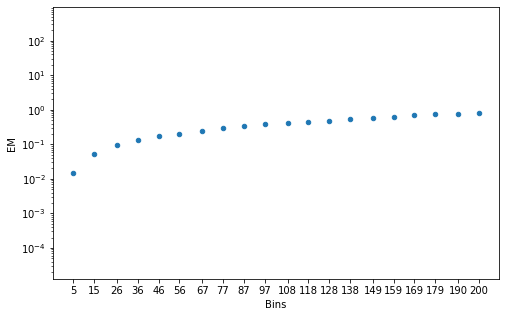

In [74]:
plt.rcParams['figure.figsize'] = [8, 5]
l.plot(x = 'Bins', y = 'EM', kind = "scatter", xticks = bin_val, logy=True)

In [38]:
# data.to_csv(filepath + 'BANKNIFTY_feature_set_ECDF_complete.csv', index =  False)


# # data.to_csv(filepath + 'NIFTY50_feature_set_ECDF_complete.csv', index =  False)